In [1]:
import numpy as np
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt

# 통계분석 패키지
from scipy import stats

import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# 1. 정규분포의 확률계산
1. AS 작업 수행 시, 평균 115분 / 표준편차 20분 소요
- AS 작업시간의 허용범위가 135분 이내라면, 135분 이상 걸리는 AS 비율

In [2]:
# 누적확률 계산

mu = 115 # 평균
sigma = 20 # 표준편차
x = 135
prob = stats.norm.cdf(x, mu, sigma)
print("{0}분 이상 걸리는 A/S 작업 비율 : {1:.1f}%".format(x, (1-prob)*100))
# 다른 표기 : print("135분 이상 걸리는 AS 비율 = %.2f%%"%((1-prob)*100))

135분 이상 걸리는 A/S 작업 비율 : 15.9%


2. 키 측정한 결과, 평균 175cm / 표준편차 5cm
- 나의 키가 180cm라면, 몇 % 범위에 위치할지 비율

In [6]:
mu = 175
sigma = 5
x = 180

prob = stats.norm.cdf(x, mu, sigma)
print("나의 키가 180cm일 경우 %.1f%% 범위에 위치한다"%((1-prob)*100))

나의 키가 180cm일 경우 15.9% 범위에 위치한다


3. 자동차 1리터당 주행거리 평균 = 12km, 표준편차 3km인 정규분포
- 1리터를 가지고 12km 이상 15km 이하 달릴 확률

In [8]:
mu = 12
sigma = 3
x1 = 15

prob1 = stats.norm.cdf(x1, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.3f}".format(mu, x1, (prob1-0.5)))

12km 이상 15km 이하를 달릴 확률은 0.341


# 2. t분포

1. t = 1.53 ~ t(5) 일 때, P(T≤t) = ?

In [10]:
t = 1.53
df = 5 #자유도

prob = stats.t.cdf(t, df)
print("P(T<=F): {:.3f}".format(prob))

P(T<=F): 0.907


1-1. 자유도를 높인다면?

In [11]:
t = 1.53
df = 30

prob = stats.t.cdf(t, df)
print("P(T<=F): {:.3f}".format(prob))

P(T<=F): 0.932


2. t = 2.0 ~ t(100)일 때, P(T≤t) = ?

In [12]:
t = 2
df = 100

prob = stats.t.cdf(t, df)
print("P(T<=F): {:.3f}".format(prob))

P(T<=F): 0.976


# 3. 카이제곱분포의 확률계산
1. 카이제곱분포 그리기 연습
    - 랜덤 데이터 생성 : n = 1000, 자유도 = 10
    - 랜덤 데이터 생성 : n = 1000, 자유도 = 40

C:\Users\Myung-jin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

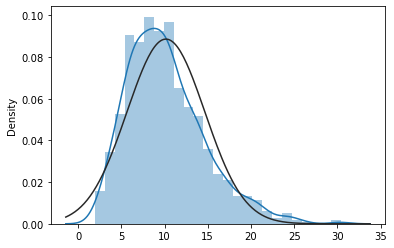

In [20]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed=1234)

# 카이제곱분포 데이터 생성
chisq_df10 = np.random.chisquare(df=10, size=1000)

sns.distplot(chisq_df10, fit = stats.norm, kde = True)

C:\Users\Myung-jin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

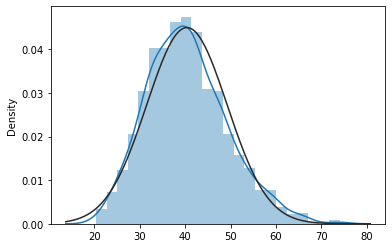

In [17]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed=1234)

# 카이제곱분포 데이터 생성
chisq_df10 = np.random.chisquare(df=40, size=1000)

sns.distplot(chisq_df10, fit = stats.norm, kde = True)

2. 카이제곱분포 그리기 연습
    - 랜덤 데이터 생성 : n = 1000, 자유도 = 3
    - 랜덤 데이터 생성 : n = 1000, 자유도 = 50

C:\Users\Myung-jin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

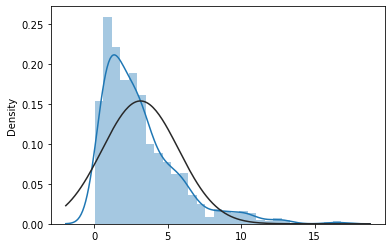

In [18]:
chisq_df10 = np.random.chisquare(df=3, size=1000)
sns.distplot(chisq_df10, fit = stats.norm, kde = True)

C:\Users\Myung-jin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

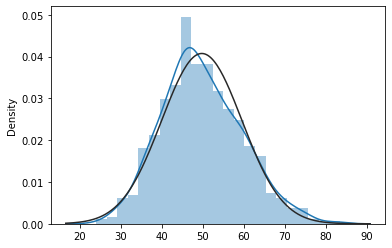

In [19]:
chisq_df10 = np.random.chisquare(df=50, size=1000)
sns.distplot(chisq_df10, fit = stats.norm, kde = True)

3. 확률변수 chi2 ~ $chisq$(30)
- chi2 = 10일 때, P(X ≤ chi2) = ?

In [21]:
chisq = 10
df = 30

prob = stats.chi2.cdf(chisq, df)
print("P(X<={0} : {1:.4f})".format(chisq, prob))

P(X<=10 : 0.0002)


4. 확률변수 chi2 ~ $chisq$(8)
- chi2 = 3.0일 때, P(X ≤ chi2) = ?

In [22]:
chisq = 3
df = 8

prob = stats.chi2.cdf(chisq, df)
print("P(X<={0} : {1:.4f})".format(chisq, prob))

P(X<=3 : 0.0656)


# 4. F분포의 확률계산
1. F분포 P(X≤F) 계산 
- F(15, 15) 분포를 따르는 F = 2일 때, P(X≤F) = ?

In [23]:
f = 2.0
dfnum = 15
dfden = 15

prob = stats.f.cdf(x=f, dfn=dfnum,dfd = dfden)
print("P(X<=F):{:.3f}".format(prob))

P(X<=F):0.904


- F(10, 100) 분포를 따르는 F = 1.5일 때, P(X≤F) = ?

In [24]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn=dfnum,dfd = dfden)
print("P(X<=F):{:.3f}".format(prob))

P(X<=F):0.850


# 5. 와이블 분포의 확률계산

- 어떤 제품의 수명시간 x가 형상모수 2.2, 척도모수 1200인 와이블 분포
- 적어도 1500시간 이상 작동할 확률

In [25]:
x = 1500
alpha = 2.2
beta = 1200

prob = stats.weibull_min.cdf(x, alpha, scale=beta)
print("P(X<=x): {:.3f}".format(1-prob))

P(X<=x): 0.195


- 어떤 제품의 수명시간 x가 형상모수 5.2, 척도모수 2200인 와이블 분포
- 적어도 2500시간 이상 작동할 확률

In [26]:
x = 2500
alpha = 5.2
beta = 2200

prob = stats.weibull_min.cdf(x, alpha, scale=beta)
print("P(X<=x): {:.3f}".format(1-prob))

P(X<=x): 0.143


# 6. 이항분포의 확률계산

- 불량 = 40%
- 3대의 차량을 임의로 선택했을 때, 각각 0~3대가 나올 확률은?
<br>$P(X=x) = nCxp^x(1-p)^{(n-x)}$, n=3

In [27]:
n = 3
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.4)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


- 불량 = 30%
- 5대의 차량 임의 선택, 불량대수가 0~5대가 나올 확률은?

In [28]:
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


# 7. 포아송 분포의 확률 계산

- 1분당 평균 2회의 전화, 전화 도착 횟수가 포아송분포를 따른다
    - 교환대에 1분당 3번의 전화가 걸려올 확률
    - 교환대에 1분당 최대 2회 이하의 전화가 걸려올 확률

In [30]:
mu = 2
prob = stats.poisson.pmf(3, mu)

cdf_prob = stats.poisson.cdf(2, mu)
print("1분당 {0}번의 전화가 걸려올 확률: {1:.2f}".format(3, prob))
print("1분당 최대 {0}회 이하의 전화가 걸려올 확률 : {1:.2f}".format(2, cdf_prob))

1분당 3번의 전화가 걸려올 확률: 0.18
1분당 최대 2회 이하의 전화가 걸려올 확률 : 0.68


# 표본분포

In [31]:
from scipy.stats import shapiro

ds_camshaft = pd.read_csv("C:/Users/Myung-jin/21aibigdata/210809_dataset/camshaft.csv")
ds_camshaft.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [32]:
data1 = ds_camshaft['Supp1']
shapiro(data1)

ShapiroResult(statistic=0.9788156747817993, pvalue=0.10744144767522812)

In [33]:
statistic, p = stats.shapiro(data1)
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test : statistic=0.9788156747817993, p-value=0.10744144767522812


- 모평균 추정(모표준편차 아는 경우)

In [34]:
import pandas as pd
df = pd.DataFrame({'sample': [3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4,2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4,
                              2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5,3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
df.head()

,sample
0,3.6
1,2.9
2,2.8
3,2.6
4,3.4


In [35]:
lower, upper = stats.norm.interval(0.90, loc = np.mean(df), scale = 0.397/np.sqrt(40))
print("신뢰구간 : ({0}, {1})".format(lower.round(4), upper.round(4)))

신뢰구간 : ([2.5918], [2.7982])


- 모평균 추정(모표준편차 모르는 경우)

In [36]:
df = pd.DataFrame({'sample': [54.1, 53.3, 56.1, 55.7, 54.0, 54.1, 54.5, 57.1, 55.2, 53.8,
                             54.1, 54.1, 56.1, 55.0, 55.9, 56.0, 54.9, 54.3, 53.9, 55.0]})

lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([54.39], [55.33])


In [37]:
np.mean(df)

sample    54.86
dtype: float64